Importing required libraries

In [0]:
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt

Function to load data from cifar10

In [0]:
def loadData(path='./data/cifar-10-batches-py/'):
    listOfTestFiles = os.listdir(path=path)
    train = []
    train_labels = []
    test = []
    test_labels = []
        
        
    print("Training files = ",listOfTestFiles[1:7])
    #For collecting Training data:
    for file in listOfTestFiles[1:6]:
        if(file!='.ipynb_checkpoints'):
            with open(path+file,'rb') as fo:
                data_dict = pickle.load(fo,encoding='bytes')
                train.append(data_dict[b'data'])
                train_labels.append(data_dict[b'labels'])

    #print(listOfTestFiles[7])
    #for collecting Testing data
    with open(path+'test_batch','rb') as fo:
            data_dict = pickle.load(fo,encoding='bytes')
            test.append(data_dict[b'data'])
            test_labels.append(data_dict[b'labels'])

    dictData = {}
    dictData['train_data'] = np.reshape(np.array(train),newshape=(np.array(train).shape[0]*np.array(train).shape[1],np.array(train).shape[2]))
    dictData['train_labels'] = np.reshape(np.array(train_labels),newshape=(np.array(train_labels).shape[0]*np.array(train_labels).shape[1]))
    dictData['test_data'] = np.reshape(np.array(test),newshape=(np.array(test).shape[0]*np.array(test).shape[1],np.array(test).shape[2]))
    dictData['test_labels'] = np.reshape(np.array(test_labels),newshape=(np.array(test_labels).shape[0]*np.array(test_labels).shape[1]))
    return dictData

Visualizaing train sample

Training files =  ['data_batch_3', 'data_batch_2', '.ipynb_checkpoints', 'test_batch', 'data_batch_4', 'data_batch_1']


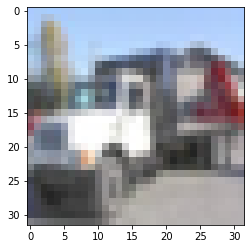

In [85]:
dataset = loadData();

temp = dataset['test_data'][45]

R = temp[0:1024].reshape(32,32)
G = np.reshape(temp[1024:2048],newshape=(32,32))
B = np.reshape(temp[2048:],newshape=(32,32))
temp = np.dstack((R,G,B))
plt.imshow(temp)
plt.show()

Getting test data from dataset

In [0]:
x_train,y_train, x_test, y_test = dataset['train_data'],dataset['train_labels'],dataset['test_data'],dataset['test_labels']

Summarizing training data to 4000 and testing data to 1000

In [82]:
train_x,train_y = x_train[0:4000],y_train[0:4000]
val_x, val_y = x_train[0:1000],y_train[0:1000]

Shape is  (10000, 3072)
Shape is  (10000,)
No. of training samples =  4000
No. of validation set samples =  1000


Class and Functions for KNN

In [0]:
class kNearestNeighbour(object):
    def __init__(self):
        pass
    
    def train(self,X,Y):
        #Knn will remember all of its training data
        self.Xtr = X
        self.Ytr = Y
        
    def predict(self,X,k):
        #to get no. of samples in train set 
        test_samples = X.shape[0]
        
        Ypred = np.zeros(test_samples,dtype=self.Ytr.dtype)
        
        #Calculating the l1 distance between current samples of test and train set
        for i in range(test_samples):
            print("Test example = ",i,end="\r")
            
            #label_count is array of zeros used to store the count for each class while comparing neighbours
            label_count = np.zeros(10,dtype=self.Ytr.dtype)    
            
            dist = np.sum(np.abs(X[i,:] - self.Xtr),axis=1)   #take the absolute sum horizontally across columns
            
            #idx will contain k smallest indices at the start of the list
            #this is called partial sorting
            #min_ind will help us to slice through k indices which have minimum distance
            idx = np.argpartition(dist,k)
            min_ind = idx[:k]
            
            #This for loop iterates over min_ind and find the label present in train-set_Y for x
            #and increase the count at that particular index whenever any label is repeated.
            #Max value at any index is returned using np.argmax() and stored at ith index of Ypred i.e. predicted values
            for x in min_ind:
                label_count[int(self.Ytr[x])] +=1
            Ypred[i] = np.argmax(label_count)
    
    
        return Ypred

Checking accuracy for K = 3

In [83]:
#hyper-parameter k = 5
knn = kNearestNeighbour()
knn.train(train_x,train_y)
val_y_pred = knn.predict(val_x,3)

#Accuracy for validation set
print('Val accuracy = ',np.mean(val_y_pred==val_y))

Val accuracy =  0.469


Checking accuracy for K = 5

In [84]:
#hyper-parameter k = 5

val_y_pred = knn.predict(val_x,5)

print('Val accuracy = ',np.mean(val_y_pred==val_y))

Val accuracy =  0.428


Checking accuracy for K = 7

In [86]:
#hyper-parameter k = 7

val_y_pred = knn.predict(val_x,7)

print('Val accuracy = ',np.mean(val_y_pred==val_y))

Val accuracy =  0.409


Checking accuracy for K = 9

In [87]:
#hyper-parameter k = 9

val_y_pred = knn.predict(val_x,9)

print('Val accuracy = ',np.mean(val_y_pred==val_y))

Val accuracy =  0.38
